#Feature Selection- Filter Method:ANOVA Test
https://github.com/solegalli/feature-selection-for-machine-learning/blob/main/05-Filter-Statistical-Tests/05.3-Univariate-selection.ipynb



# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression
# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
dataset=pd.read_csv("/content/dataset_2.csv",nrows=50000)

In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(labels=['target'], axis=1),
    dataset['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [4]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues
univariate = f_classif(X_train, y_train)

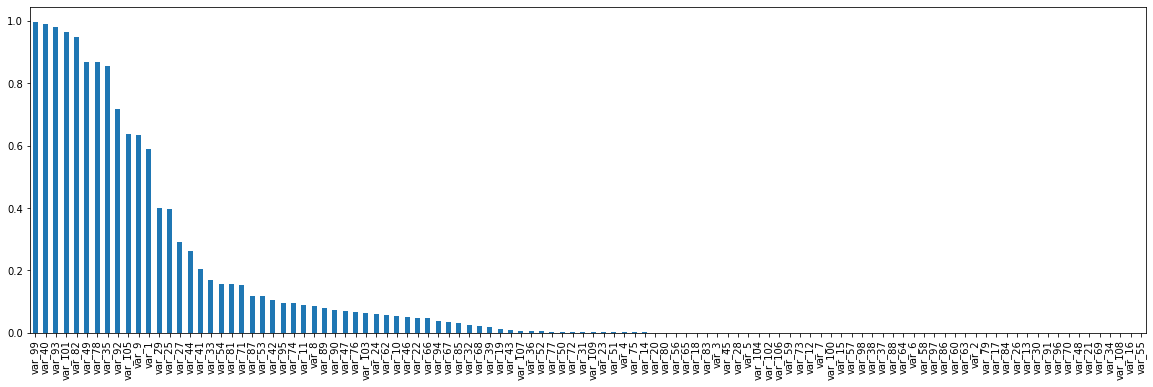

In [5]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

In [6]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [7]:
# remove unwanted features from the dataset

X_train = sel_.transform(X_train)

X_train.shape


(35000, 10)

In [10]:
X_train=pd.DataFrame(X_train)

In [13]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.00,7.353671,10.722357,1.00,0.727607,1.0,15.716616,0.0,5.736979,1.312909
1,0.91,7.530785,13.502809,0.91,3.938067,0.0,13.324742,0.0,7.373931,5.125165
